In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def hist_ready_data(study_patient_data_pd):
    study_patient_data = study_patient_data_pd[study_patient_data_pd.patient_id != "Unkown"]

    study_patient_data=study_patient_data.groupby(['abreviations',"patient_id"])["study_date"].nunique()
    #filter out all singles
    study_patient_data = study_patient_data[study_patient_data.values>1]
    return(study_patient_data)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='black', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

export_path = "./meta.csv"

meta_pd = pd.read_csv(export_path,index_col=0)
columns_meta = meta_pd.dicom_path.str.split(pat="/", n=-1, expand=True)[[2,3,4]]
columns_meta["dicom_path"] = meta_pd
columns_meta = columns_meta.rename(columns={2:"image_modality",3:"patient_id",4:"study_date"})

abreviations = columns_meta["image_modality"]
dict_ = {"IOL-Master (Optische Laserbiometrie)":'OL','Biometrie (Ultraschall)': "Bio U-Sch",
        'Autofluo3':"AF",'automatically generated':"Auto",
       "BMO (Bruch's membrane opening)":"BMO", 'Cat-OP amb':"amb",'da':"da",
       'Empty Description':"None", 'En Face (OCT)':"EF OCT", 'enface':"enface", 'fc':"fc",
       'Fluoeszein + ICG Angiografie':"FL ICG Angio", 'Fluoreszein Angiografie':"FL Angio",
       'Fotostudio':"Fotostudio", 'Fundus':"Fundus", 'Generic Eye Procedure 200 R':"GEP",
       'generic order':"GO", 'Heidelberger Autofluoreszenz':"HA", 'ICG-Angiografie':"ICG Angio",
       'IOL-Wechsel':"IOL-W", 'Irisangiographie':"I-Angio", 'LOHN':"LOHN", 'Makula OCT':"M-OCT", 'ml':"ml",
       'Multicolor Aufnahme':"MC-Auf", 'nd':"nd", 'no':"no", 'No Description':"No desc",
       'Normative database':"Norm-DB", 'OP 30 min':"OP-30",
       'Optical Coherence Tomography Scanner':"OCT-scanner", 'Optos Angiographie':"OPT-Angio",
       'Optos Autofluoreszenz':"OPT-AFL", 'Optosaufnahme':"OPT-A", 'Optosfoto':"OPT-F", 'Orbita':"ORB",
       'Papille (OCT)':"Pap-OCT", 'Pentacam -CRT (Vermessung vordere Augena':"P-CRT",
       'Posterior pole (OCT)':"PP-OCT", 'ppV+CE':"ppV+CE", 'ppV+peeling':"ppV+peeling", 'Pride':"Pride",
       'RNFL Messung (Nervenfaseranalyse)':"RNFL",
       'Scanning Laser Ophthalmoscope':"IR-Fundus", 'test':"test"}

abreviations = abreviations.replace(dict_)
columns_meta["abreviations"] = abreviations

/home/olle/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
meta_pd.to_csv("meta.csv")

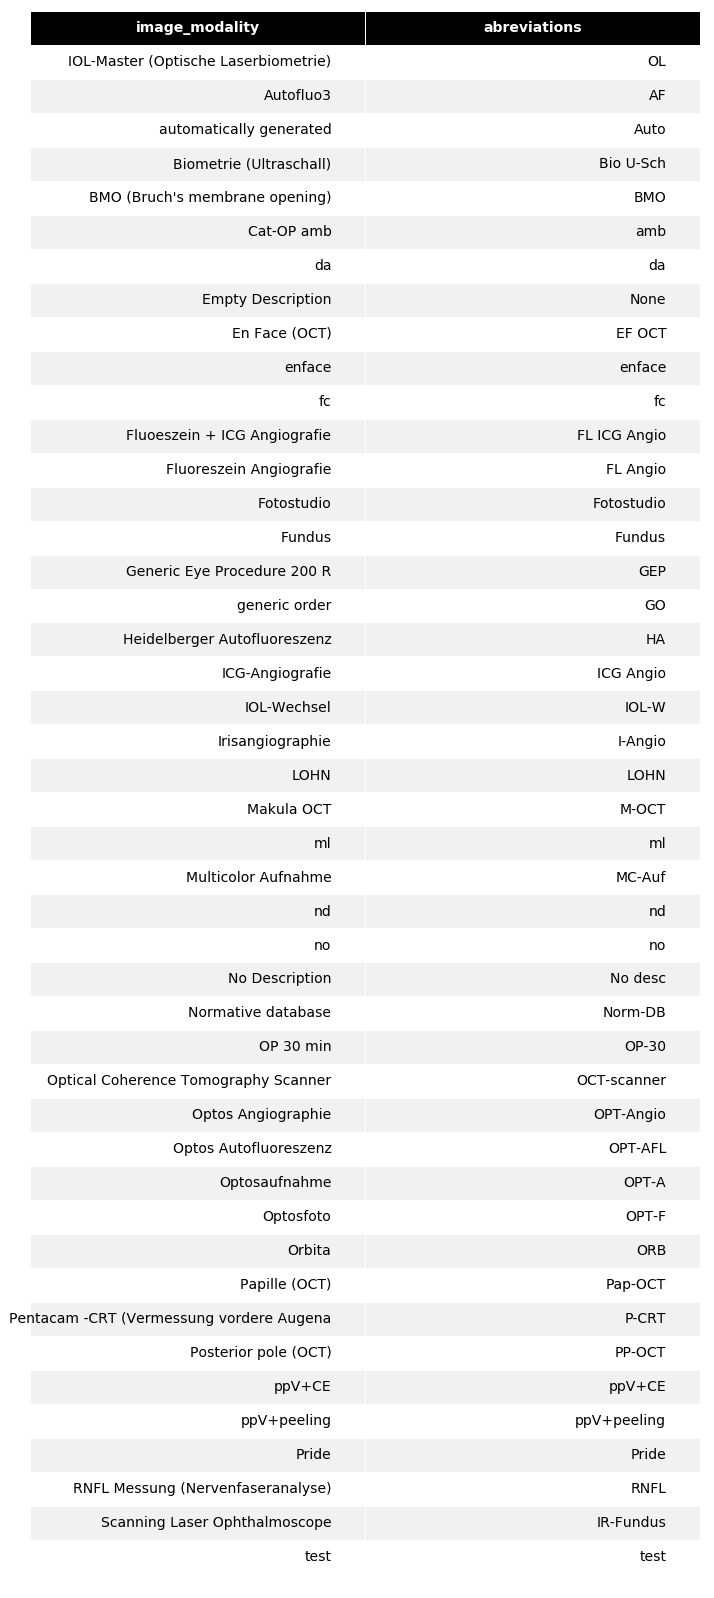

In [3]:
render_mpl_table(columns_meta[["image_modality","abreviations"]].drop_duplicates(), col_width =6)
plt.savefig("modality_abbreviation")
plt.show()

### 0: Small summary table

In [4]:
num_unique_patients = columns_meta.patient_id.nunique()
unique_studies = columns_meta.groupby(["patient_id","study_date"]).nunique()
num_unique_studies = np.sum(unique_studies.study_date)
num_unique_records = meta_pd.shape[0]

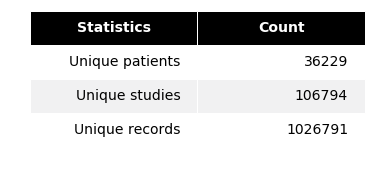

In [7]:
num = [num_unique_patients,num_unique_studies,num_unique_records]
headers = ["Unique patients", "Unique studies", "Unique records"]
main_statistics = pd.DataFrame({"Statistics":headers,"Count":num})
render_mpl_table(main_statistics)
plt.savefig("main_statistics")
plt.show()

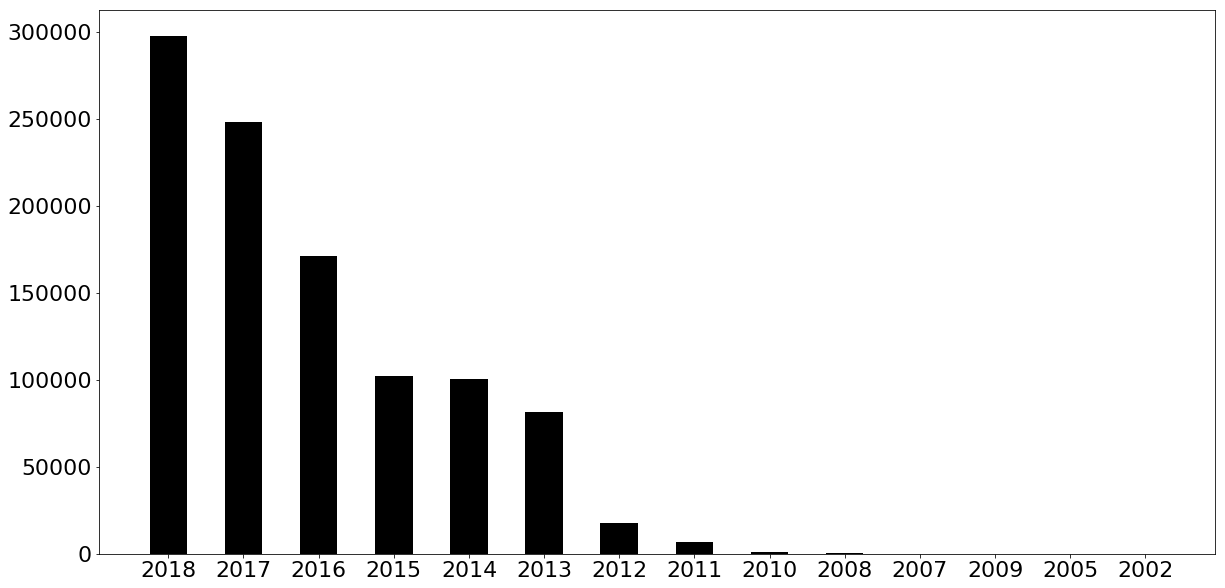

In [9]:
columns_meta["year"] = columns_meta["study_date"].str[:4]
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
studies_over_time_pd = columns_meta[["year","study_date"]]
studies_over_time = studies_over_time_pd.groupby("year").count().iloc[0:-3].reset_index()
studies_over_time = studies_over_time.sort_values(by="study_date", ascending=False)
plt.bar(studies_over_time.year, studies_over_time.study_date,width=0.5, color="black")
#plt.ylabel('Number of studies')
#plt.xlabel("year")
#plt.title('Number of studies per year')
#plt.xticks(rotation=90)
plt.savefig("number of studies per year")
plt.show()

### 1: #Records / Image modality

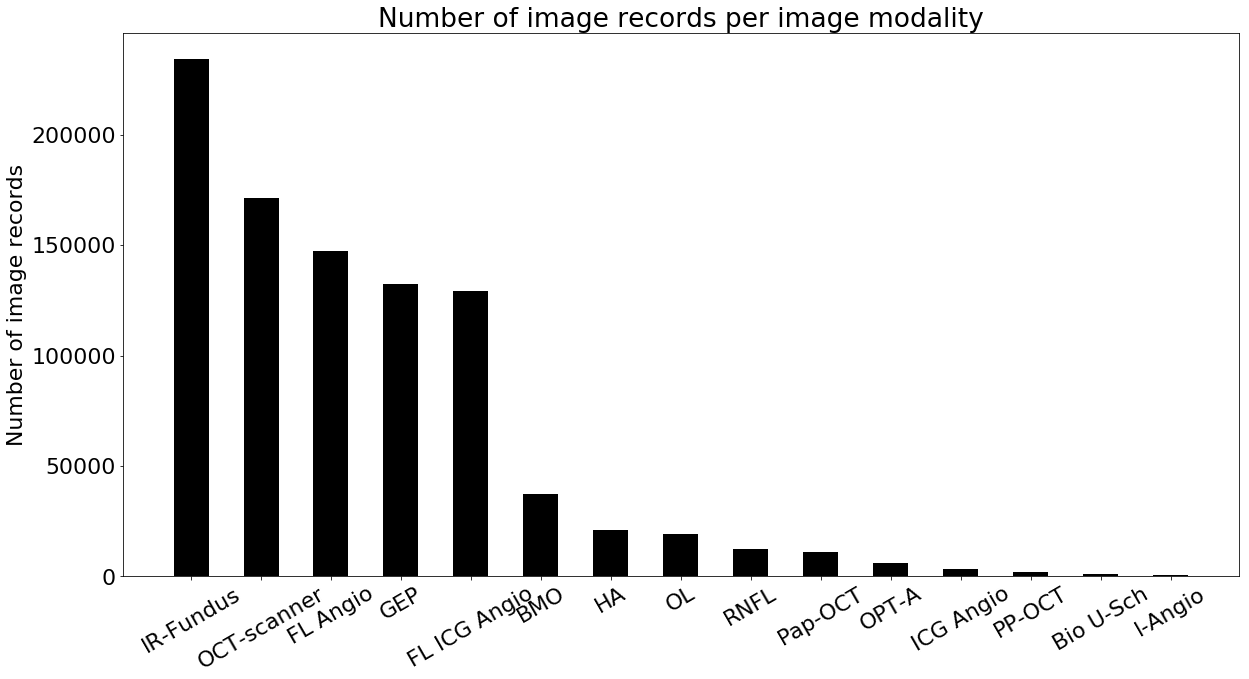

In [50]:
bar_plot_data = columns_meta[['abreviations',"dicom_path"]].groupby('abreviations').\
count().sort_values("dicom_path",ascending=False)
bar_plot_data = bar_plot_data[bar_plot_data.dicom_path >500].drop(["No desc","None"])

N = len(bar_plot_data.index)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, bar_plot_data.dicom_path.values,width, color="black")

plt.ylabel('Number of image records')
plt.title('Number of image records per image modality')
plt.xticks(ind, (bar_plot_data.index),rotation=30)
plt.savefig("Number of image records per image modality")
plt.show()

In [67]:
columns = ["IR-Fundus", "OCT-scanner","FL Angio","GEP", "FL ICG Angio", "BMO","HA","OL","RNFL","Pap-OCT",
          "OPT-A","ICG Angio", "PP-OCT", "Bio U-Sch","I-Angio"]

columns_meta_ = columns_meta[["image_modality","abreviations"]][columns_meta["abreviations"].isin(columns)]
#.drop_duplicates()

In [70]:
anatomic_pd =["Retinal layers","Retinal layers","Retinal layers","Fundus","Fundus",
                            "Fundus","Fundus","Fundus","Fundus"
 ,"Retinal layers","Retinal layers","Retinal layers",
 "Retinal layers","Retinal layers","Retinal layers"]

In [71]:
image_modality_legend_pd = columns_meta_.drop_duplicates()
image_modality_legend_pd["Obtained from"] = anatomic_pd
image_modality_legend_pd

/home/olle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,image_modality,abreviations,Obtained from
0,IOL-Master (Optische Laserbiometrie),OL,Retinal layers
19332,Biometrie (Ultraschall),Bio U-Sch,Retinal layers
20383,BMO (Bruch's membrane opening),BMO,Retinal layers
59605,Fluoeszein + ICG Angiografie,FL ICG Angio,Fundus
188830,Fluoreszein Angiografie,FL Angio,Fundus
336173,Generic Eye Procedure 200 R,GEP,Fundus
469044,Heidelberger Autofluoreszenz,HA,Fundus
489949,ICG-Angiografie,ICG Angio,Fundus
493199,Irisangiographie,I-Angio,Fundus
589071,Optical Coherence Tomography Scanner,OCT-scanner,Retinal layers


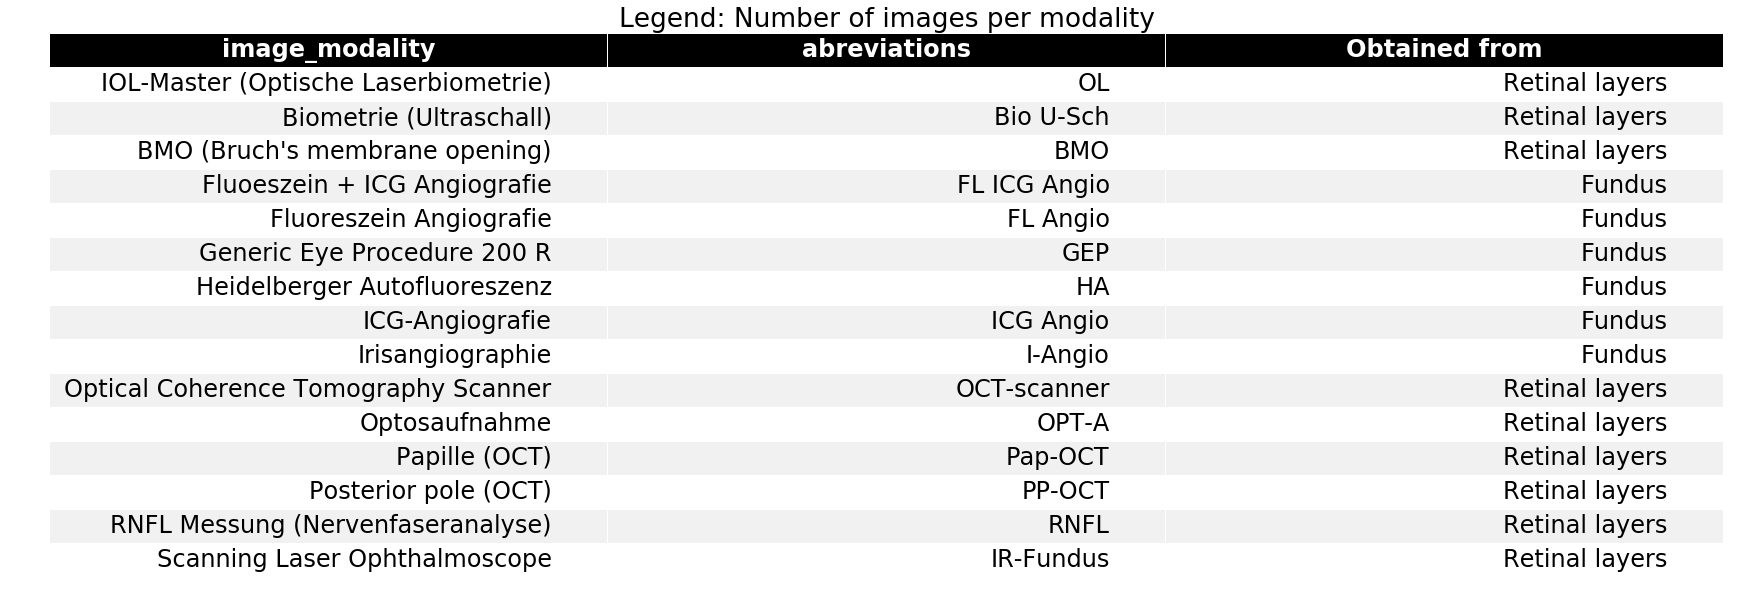

In [80]:
render_mpl_table(image_modality_legend_pd, col_width =10,font_size=24)
plt.rcParams.update({'font.size': 22})
plt.title("Legend: Number of images per modality")
plt.savefig("modality_legend")
plt.show()

### 2: # Unique patients per Image modality

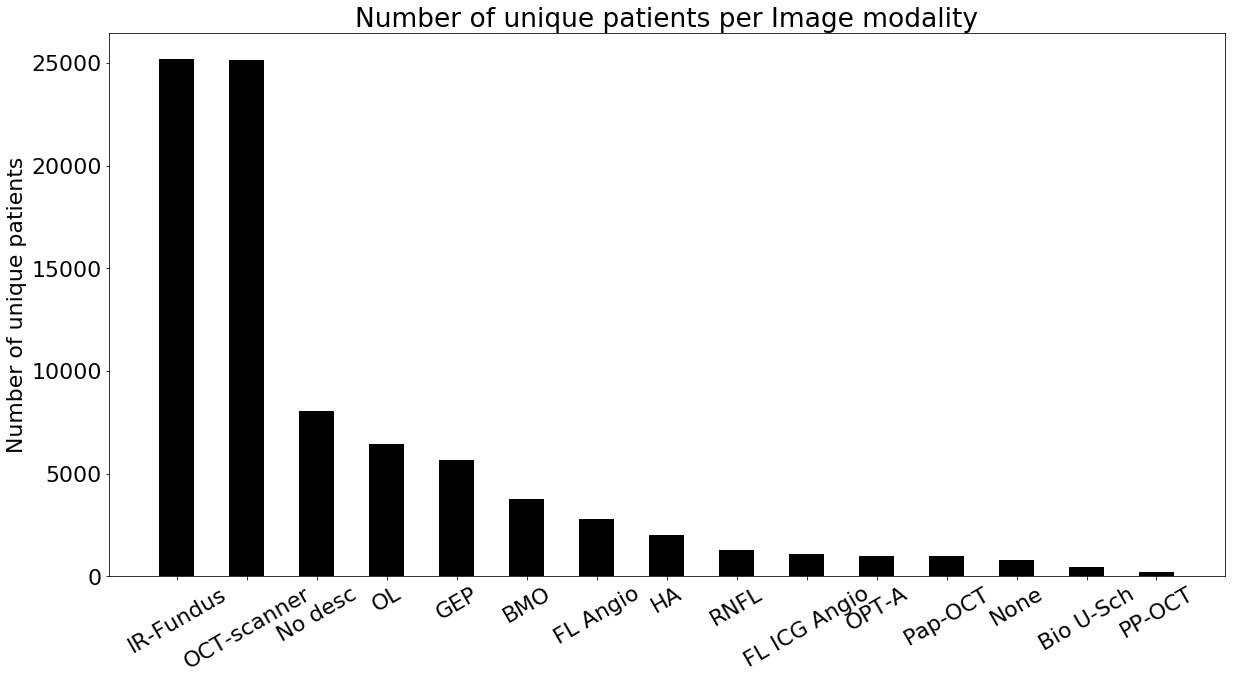

In [8]:
patient_counts = columns_meta[['abreviations',"patient_id"]].groupby('abreviations').\
nunique().sort_values("patient_id",ascending=False)[["patient_id"]]
patient_counts = patient_counts[patient_counts["patient_id"] > 100]

N = len(patient_counts.index)
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, patient_counts.patient_id.values,width, color="black")

plt.ylabel('Number of unique patients')
plt.title('Number of unique patients per Image modality')
plt.xticks(ind, (patient_counts.index),rotation=30)
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.savefig('Number of unique patients per Image modality')
plt.show()

### 3: # Studies per patient 

In [10]:
study_patient_data_pd = columns_meta[['abreviations',"patient_id","study_date"]]

In [11]:
study_patient_data = study_patient_data_pd[study_patient_data_pd.patient_id != "Unkown"]
study_patient_data=study_patient_data.groupby(["patient_id"])["study_date"].nunique()
study_patient_data = study_patient_data[study_patient_data.values>1]
study_patient_data = pd.DataFrame(study_patient_data)
study_patient_data.reset_index(inplace=True)
#study_patient_data[study_patient_data.study_date>=10]


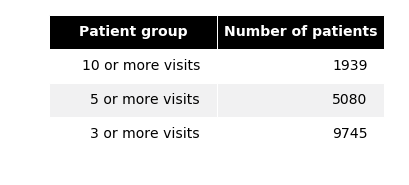

In [10]:
d = [["10 or more visits","5 or more visits","3 or more visits"],
     [1939,5080,9745]]
data = pd.DataFrame(d).T
data = data.rename(columns={0:"Patient group",1:"Number of patients"})
render_mpl_table(data)
plt.savefig("patient_counts_time")
plt.show()

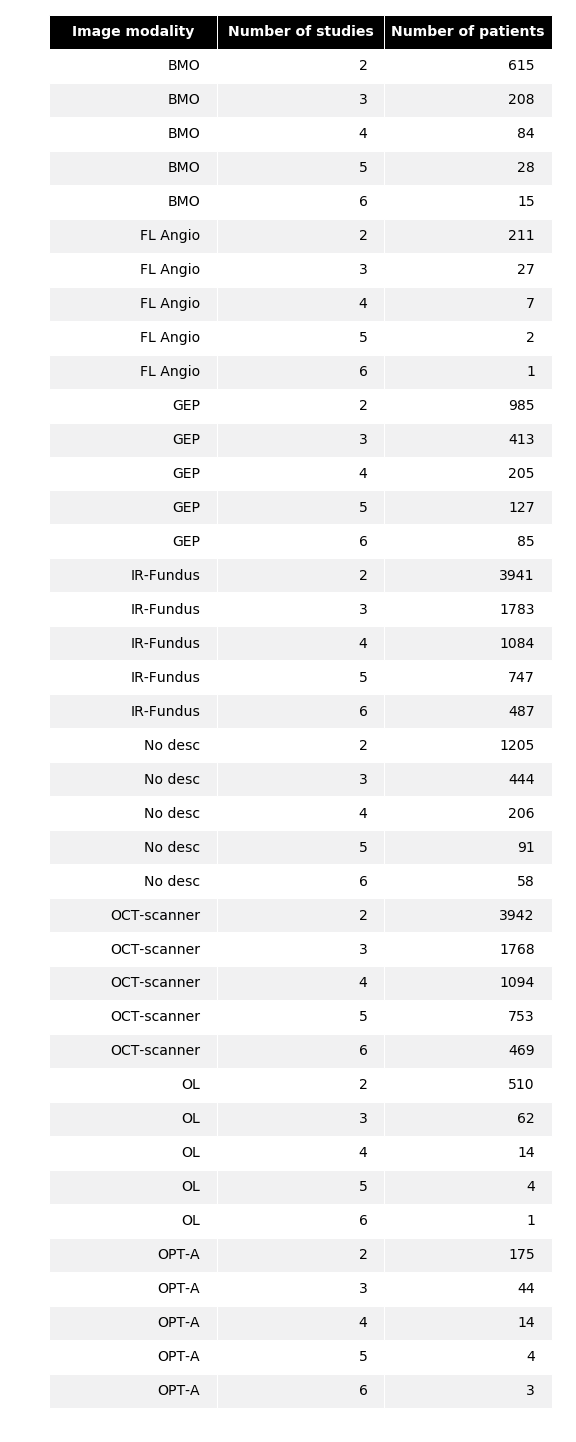

In [13]:
## table showing in figures the data in the bar plots below. Note: for brevity we only show top 5 rows wrt 
#number of patient count with the different number of studies made, also all patients with only 
#1 study made are excluded from these plots,but including a filter for any image modality 
#with less than 200 studies made

hista = hist_ready_data(study_patient_data_pd).to_frame()
bool_filter = pd.merge(hista, hista.groupby("abreviations").count().reset_index(), left_on="abreviations", right_on= "abreviations"
         , how="left").study_date_y > 200

hista = hista[bool_filter.values]
hista = hista.groupby(['abreviations',"study_date"]).size().to_frame()
hista.reset_index(inplace=True)
hista = hista.rename(columns={"abreviations":"Image modality",
                              "study_date":"Number of studies",
                              0:"Number of patients"})
viz_table = hista.groupby("Image modality").head(5)
render_mpl_table(viz_table, header_columns=0, col_width=3.0)
plt.savefig("studie per patient table")
plt.show()

/home/olle/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


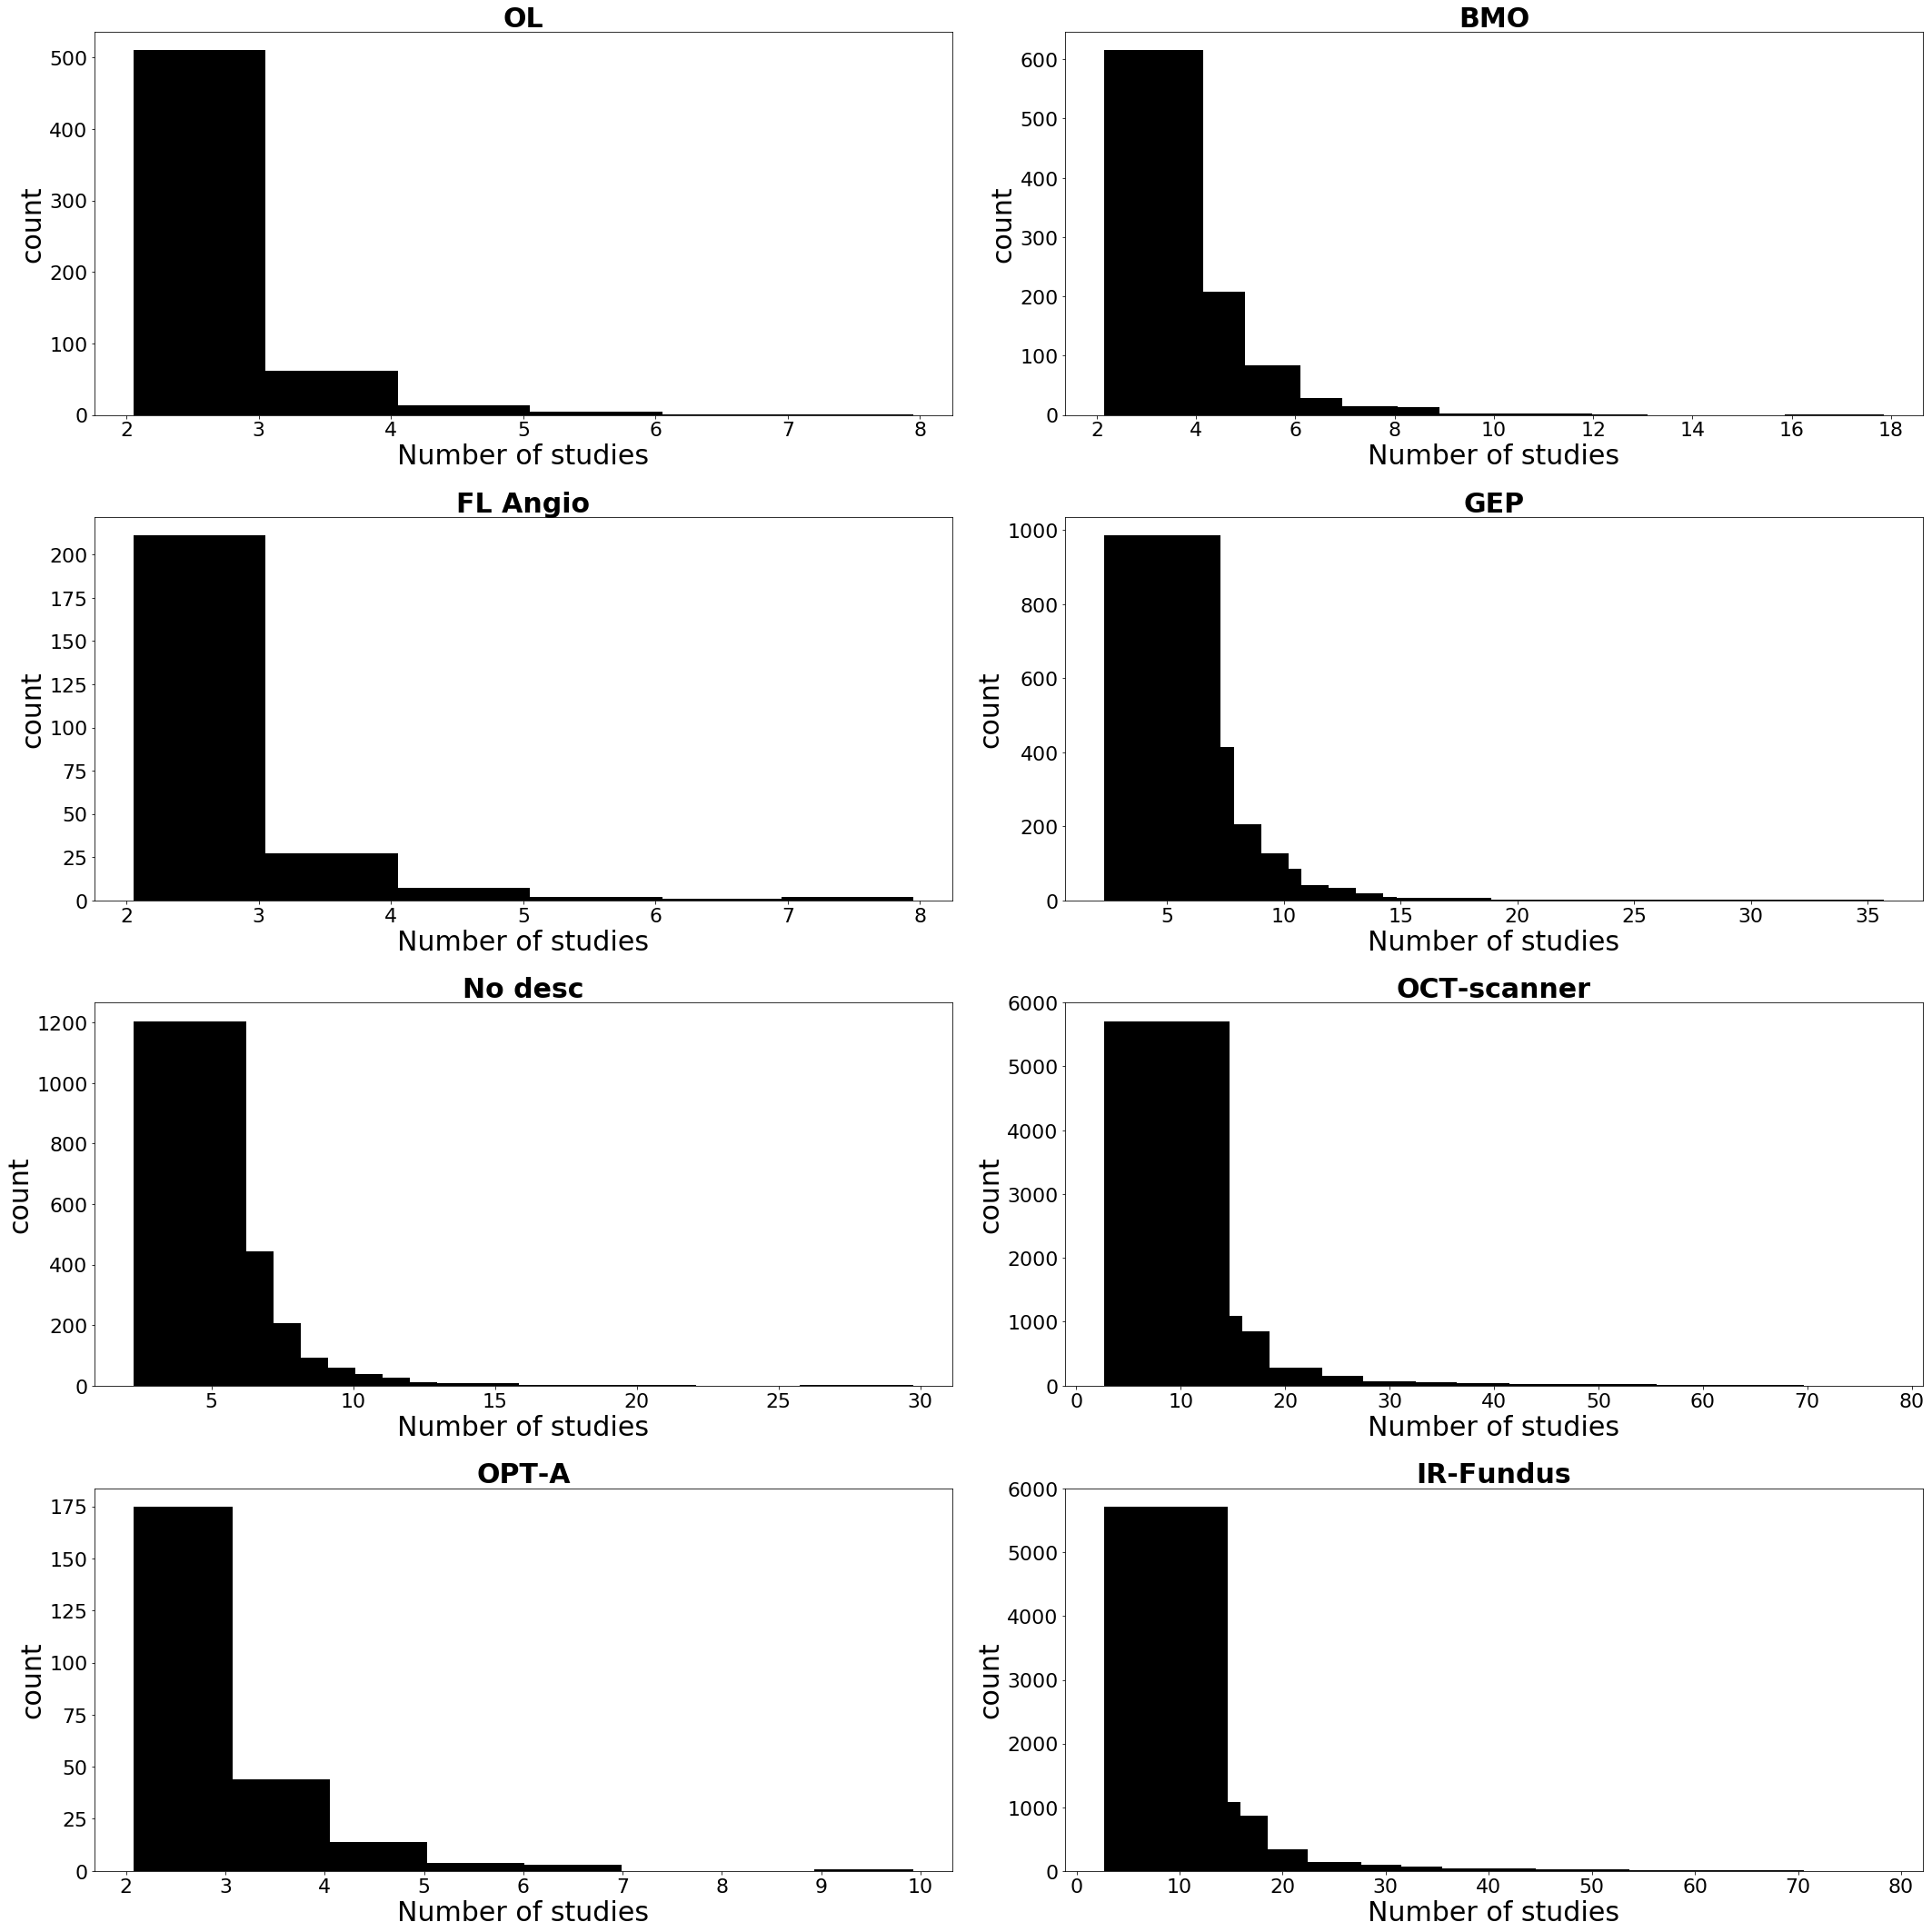

In [14]:
#same filtering as table above
fig, axs = plt.subplots(4, 2, sharey=False, sharex = False, tight_layout=True,figsize=(30,30))
i = 0 
j = 0 
for mod in pd.unique(study_patient_data_pd.abreviations):
    mod_filtered = study_patient_data_pd[study_patient_data_pd.abreviations == mod]
    study_patient_data = hist_ready_data(mod_filtered)
    if study_patient_data.shape[0] > 200:
        ## retrieve histogram ready table
        counts, divisions = np.histogram(study_patient_data.values,bins=50)
        # Plot the resulting histogram
        center = (divisions[:-1]+divisions[1:])/2
        width = 10*(divisions[1]-divisions[0])
        axs[i,j].bar(center, counts, align = 'edge', width = int(width),color="black")
        axs[i,j].set_title("Number of unique studies per patient for all image modalities")
        axs[i,j].set_title(str(mod),fontweight="bold", size=30) # Title
        axs[i,j].set_ylabel('count', fontsize = 30.0) # Y label
        axs[i,j].set_xlabel('Number of studies', fontsize = 30) # X label
        j += 1
        if j % 2 == 0:
            j = 0 
            i +=1 
plt.savefig("studies per patient histograms")
plt.show()
    

### Close up: fundus records distribution

/home/olle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


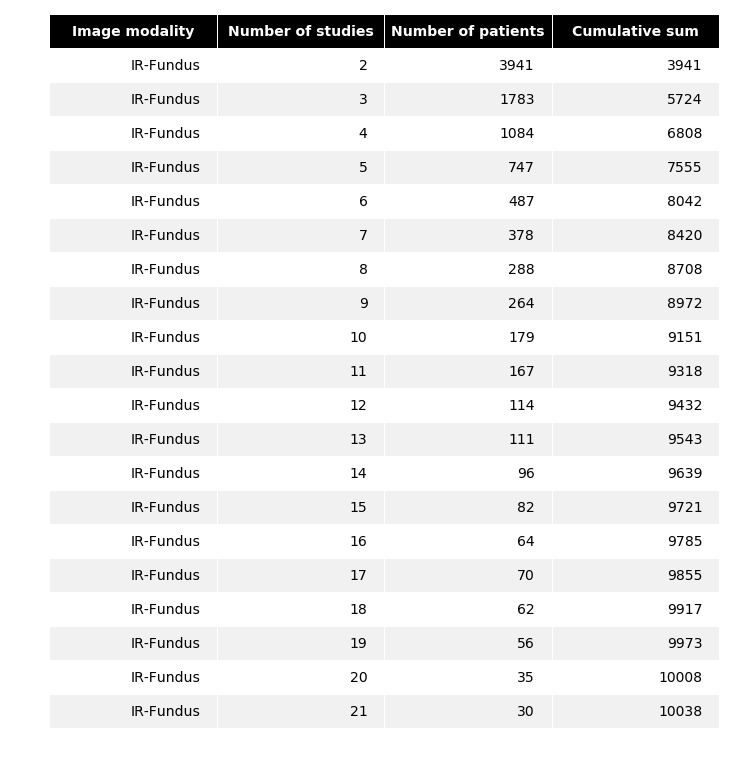

In [15]:

study_patient_data_pd = columns_meta[['abreviations',"patient_id","study_date"]]

hista = hist_ready_data(study_patient_data_pd).to_frame()
bool_filter = pd.merge(hista, hista.groupby("abreviations").count().reset_index(), left_on="abreviations", right_on= "abreviations"
         , how="left").study_date_y > 200

hista = hista[bool_filter.values]
hista = hista.groupby(['abreviations',"study_date"]).size().to_frame()
hista.reset_index(inplace=True)
hista = hista.rename(columns={"abreviations":"Image modality",
                              "study_date":"Number of studies",
                              0:"Number of patients"})
hista_fundus = hista[hista["Image modality"] == "IR-Fundus"]
hista_fundus["Cumulative sum"] = hista_fundus["Number of patients"].cumsum()
viz_table = hista_fundus[hista_fundus["Image modality"] == "IR-Fundus"].groupby("Image modality").head(20)
render_mpl_table(viz_table, header_columns=0, col_width=3.0)
plt.savefig("studie per patient fundus table")
plt.show()

In [48]:
hista_fundus_ordered = hista_fundus[hista_fundus["Number of studies"]<30]
hista_fundus_ordered

,Image modality,Number of studies,Number of patients,Cumulative sum
39,IR-Fundus,2,3941,3941
40,IR-Fundus,3,1783,5724
41,IR-Fundus,4,1084,6808
42,IR-Fundus,5,747,7555
43,IR-Fundus,6,487,8042
44,IR-Fundus,7,378,8420
45,IR-Fundus,8,288,8708
46,IR-Fundus,9,264,8972
47,IR-Fundus,10,179,9151
48,IR-Fundus,11,167,9318


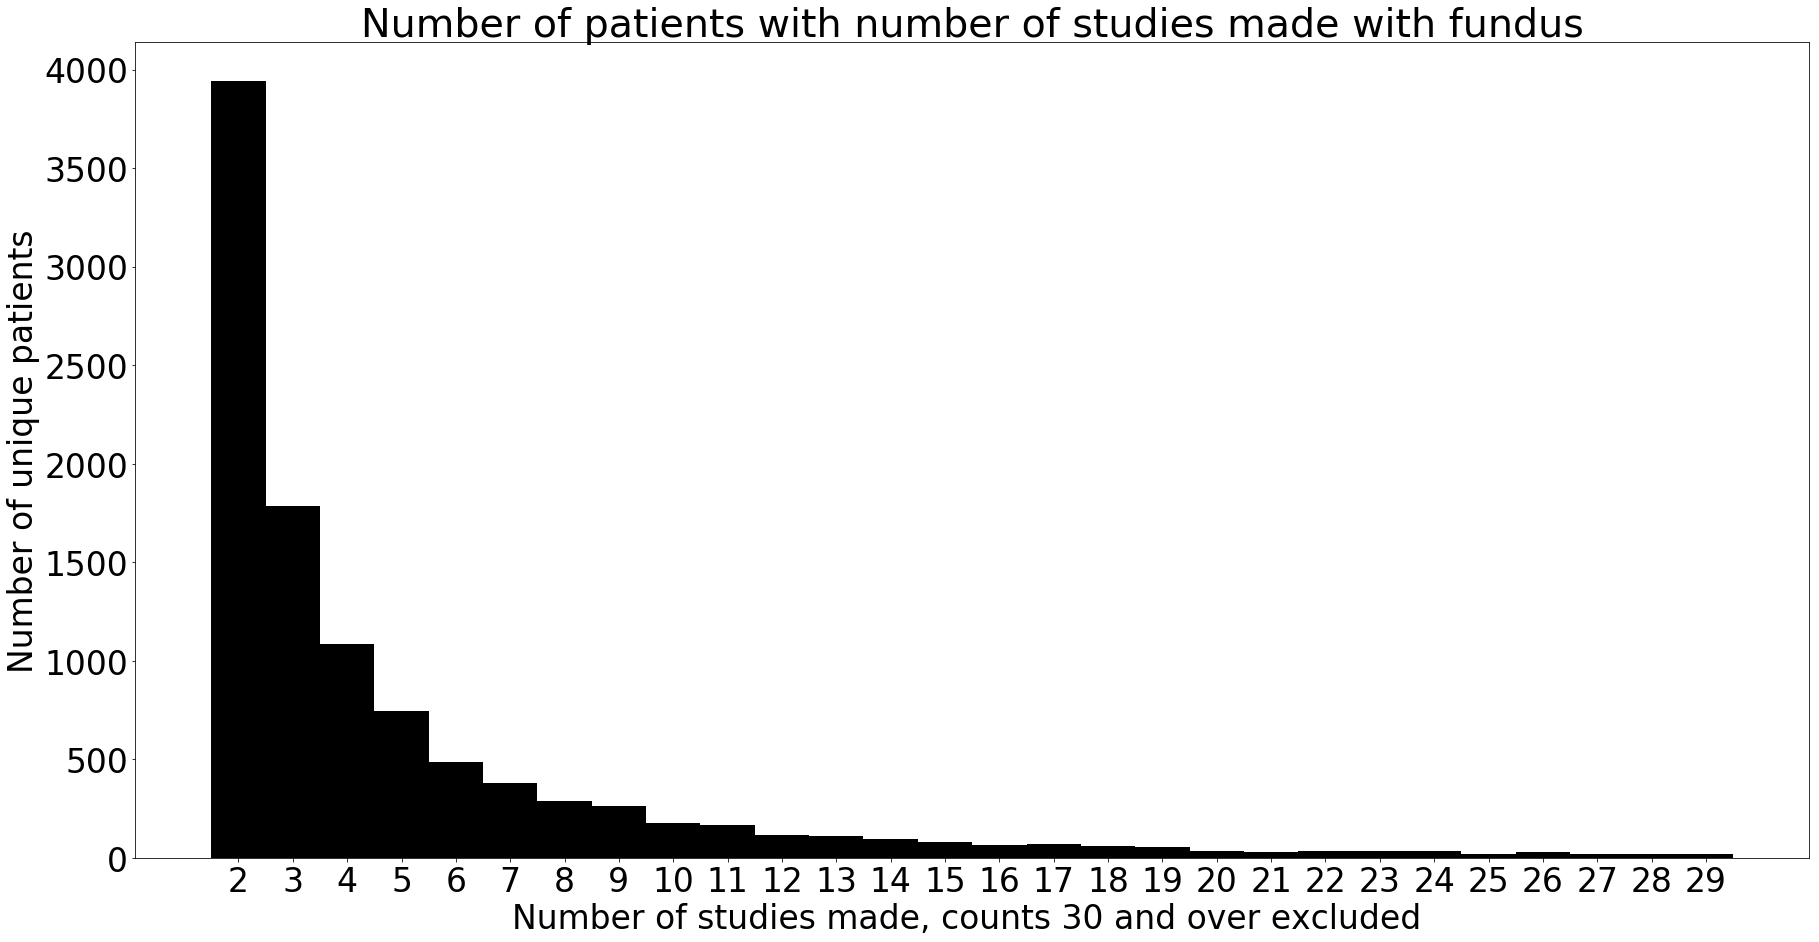

In [50]:
num_studies = hista_fundus_ordered["Number of studies"]
num_patiens = hista_fundus_ordered["Number of patients"]
N = len(num_studies.index)
plt.figure(figsize=(30,15))

ind = np.arange(N)    # the x locations for the groups
width = 1      # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, num_patiens,width, color="black")
plt.rcParams.update({'font.size': 33})

plt.ylabel('Number of unique patients')
plt.xlabel('Number of studies made, counts 30 and over excluded ')
plt.title('Number of patients with number of studies made with fundus')
plt.xticks(ind, (num_studies),rotation=0)
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.savefig('Number of patients with number of studies made with fundus')
plt.show()

### Close up: OCT records distribution

/home/olle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



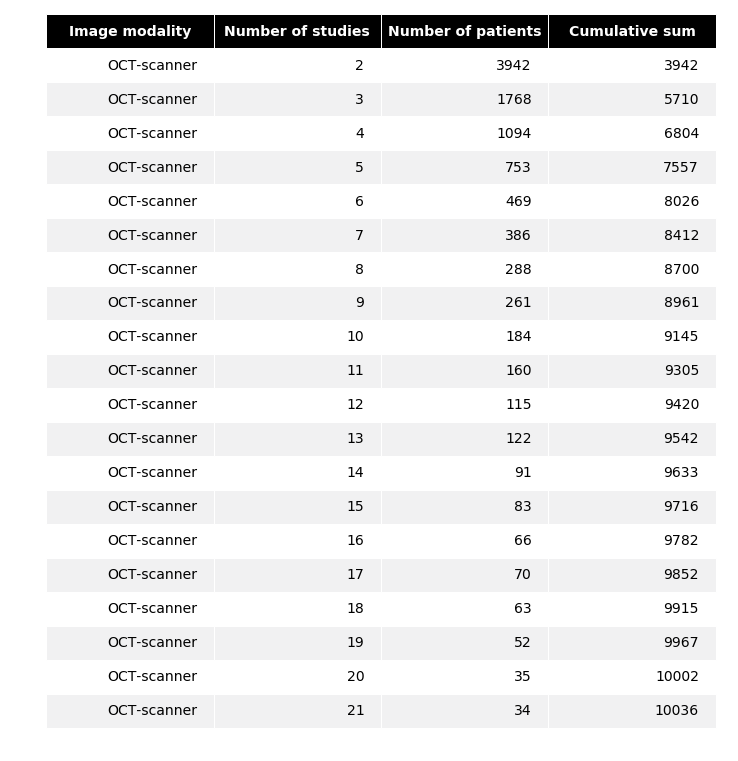

In [558]:
study_patient_data_pd = columns_meta[['abreviations',"patient_id","study_date"]]

hista = hist_ready_data(study_patient_data_pd).to_frame()
bool_filter = pd.merge(hista, hista.groupby("abreviations").count().reset_index(), left_on="abreviations", right_on= "abreviations"
         , how="left").study_date_y > 200

hista = hista[bool_filter.values]
hista = hista.groupby(['abreviations',"study_date"]).size().to_frame()
hista.reset_index(inplace=True)
hista = hista.rename(columns={"abreviations":"Image modality",
                              "study_date":"Number of studies",
                              0:"Number of patients"})
hista_oct = hista[hista["Image modality"] == "OCT-scanner"]
hista_oct["Cumulative sum"] = hista_oct["Number of patients"].cumsum()
viz_table = hista_oct[hista_oct["Image modality"] == "OCT-scanner"].groupby("Image modality").head(20)
render_mpl_table(viz_table, header_columns=0, col_width=3.0)
plt.savefig("studie per patient oct table")
plt.show()

In [17]:
num_studies = hista_oct["Number of studies"]
num_patiens = hista_oct["Number of patients"]
#N = len(num_studies.index)
plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 22})

ind = np.arange(N)    # the x locations for the groups
width = 1      # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, num_patiens,width, color="black")

plt.ylabel('Number of unique patients')
plt.xlabel('Number of studies made')
plt.title('Number of unique patients with number of studies made obtaining oct')
plt.xticks(ind, (num_studies),rotation=0, fontsize=16)
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.savefig('Number of unique patients with number of studies made obtaining oct')
plt.show()

NameError: name 'hista_oct' is not defined